<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Modul 9 – Morfologi <b>(Erosi, Dilasi, Opening, Closing, Transformasi Top-hat dan Bottom-hat, Skeleton, Thickening)</b>

1. Import folder yang ada di Drive Anda dengan cara sebagai berikut

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

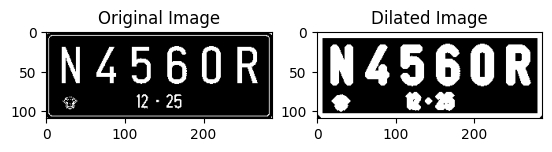

In [3]:
def dilate(image, sed, iterations):
    output = np.zeros(image.shape, dtype=np.uint8)
    rows, cols = image.shape

    # Looping untuk melakukan dilasi
    for k in range(iterations):
        for i in range(1, rows - 1):
            for j in range(1, cols - 1):
                if image[i, j] > 0:
                    output[i-1:i+2, j] = 255
                    output[i, j-1:j+2] = 255
        image = np.copy(output)

    return output

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Konversi citra menjadi citra biner
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Menerapkan dilasi dengan SED berbentuk cross 3 x 3
sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Jumlah iterasi dilasi
iterations = 3

dilated_image = dilate(thresh, sed, iterations)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(thresh, 'gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(dilated_image, 'gray'), plt.title('Dilated Image')
plt.show()

 4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

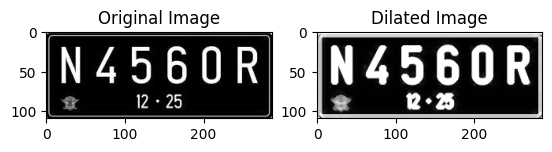

In [4]:
image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Kernel untuk dilasi
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Melakukan operasi dilasi
dilated_image = cv2.dilate(image, kernel, iterations=2)

# Menampilkan gambar asli dan hasil dilasi
plt.subplot(1, 2, 1), plt.imshow(image, 'gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(dilated_image, 'gray'), plt.title('Dilated Image')
plt.show()

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

<ipython-input-57-bc898e44a963>:34: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


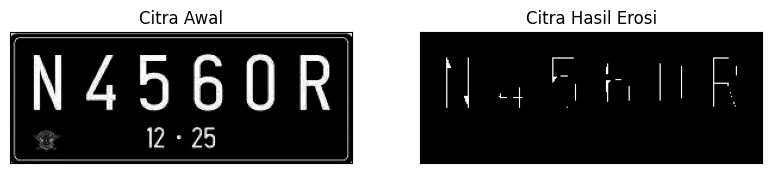

In [57]:
def image_erotion(image, se):
	height, width = image.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SEE
	SEE = np.ones((se,se), dtype=np.uint8)
	c = int((se-1)/2)

	# # Looping untuk melakukan erosion
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = image[i-c:i+c+1, j-c:j+c+1]
			product = temp * SEE
			output_image[i,j] = np.min(product)

	return output_image

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)
gamma_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
	for x in range(image.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (image[y,x]/255.0) ** (2/1), 0, 255)

# Konversi citra menjadi citra biner
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)

# Melakukan operasi dilasi
output_image = image_erotion(thresh,5)

# Menampilkan gambar asli dan hasil erosi
plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'),plt.xticks([]), plt.yticks([])
plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

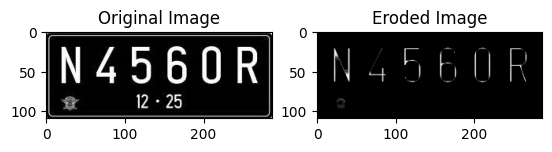

In [14]:
image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

# Membuat kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)

# Melakukan operasi erosi
eroded_image = cv2.erode(image, kernel, iterations=1)

# Menampilkan gambar asli dan hasil erosi
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(eroded_image, cmap='gray'), plt.title('Eroded Image')
plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV

<ipython-input-19-7a17213119df>:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


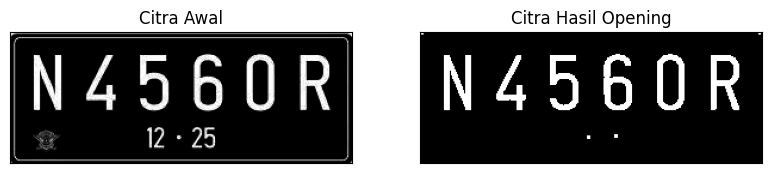

In [19]:
# tanpa library morphology dari openCV
# dilasi
def dilation(image, se):
	height, width = image.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SED
	SED = np.ones((se,se), dtype=np.uint8)
	c = int((se-1)/2)

	# Dilation
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = image[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)

	return output_image

# erosion
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosioned_image = cv2.erode(thresh,kernel,iterations = 1)

# fungsi opening
def image_opening(image, se):
	eroded_image = image_erotion(image, se)
	opened_image = dilation(eroded_image, se)
	return opened_image

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)
gamma_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
	for x in range(image.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (image[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

<ipython-input-21-9299808b975e>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


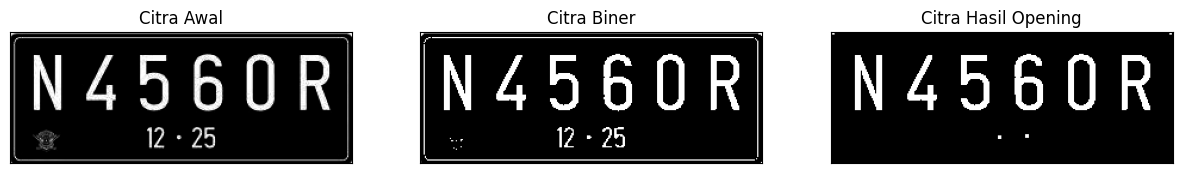

In [21]:
# dengan library morphology dari openCV
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
se = 3
output_image = image_opening(thresh, se)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'),plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

8.  Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

<ipython-input-34-26a9b0bbd632>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


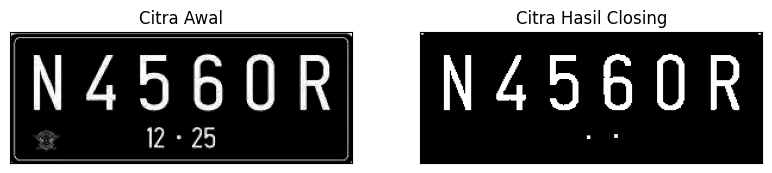

In [34]:
# tanpa library morphology dari openCV
# dilasi
def dilation(image, se):
	height, width = image.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SED
	SED = np.ones((se,se), dtype=np.uint8)
	c = int((se-1)/2)

	# Dilation
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = image[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)

	return output_image

# erosion
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosioned_image = cv2.erode(thresh,kernel,iterations = 1)

# fungsi opening
def image_closing(image, se):
	dilated_image = dilation(image, se)
	closed_image = image_erotion(dilated_image, se)
	return closed_image

image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)
gamma_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
	for x in range(image.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (image[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 1
closed_image = image_closing(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Closing'),plt.xticks([]), plt.yticks([])
plt.show()

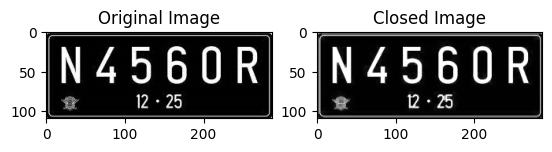

In [36]:
# dengan library
se_dilation = np.ones((3, 3), dtype=np.uint8)
se_erosion = np.ones((3, 3), dtype=np.uint8)

dilated_image = cv2.dilate(image, se_dilation)

# Perform erosion using cv2.erode on the dilated image
closed_image = cv2.erode(dilated_image, se_erosion)

# Display the original and closed images
plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(closed_image, cmap="gray"), plt.title("Closed Image")
plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5

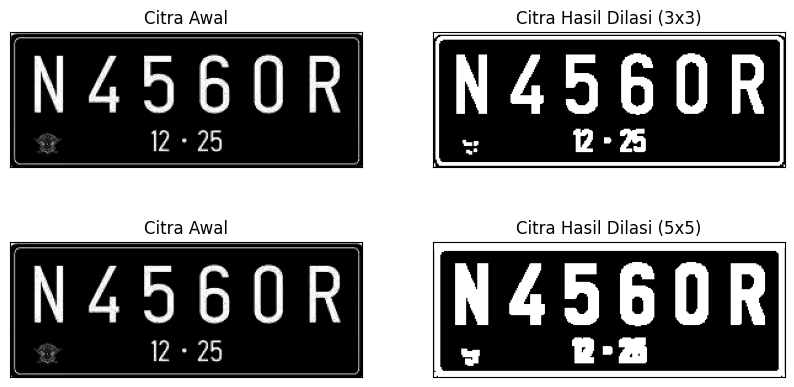

In [37]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,3),np.uint8)
kernel_5 = np.ones((5,5),np.uint8)
output_image_3 = cv2.dilate(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.dilate(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

10. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7

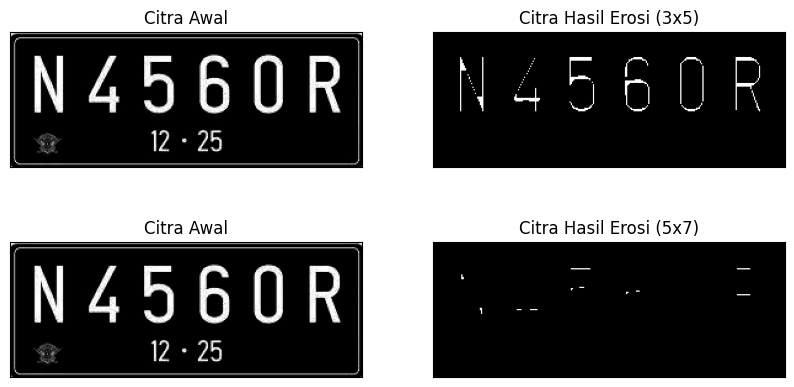

In [38]:
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel_3 = np.ones((3,5),np.uint8)
kernel_5 = np.ones((5,7),np.uint8)
output_image_3 = cv2.erode(thresh,kernel_3,iterations = 1)
output_image_5 = cv2.erode(thresh,kernel_5,iterations = 1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(output_image_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi (3x5)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(output_image_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi (5x7)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

11. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5

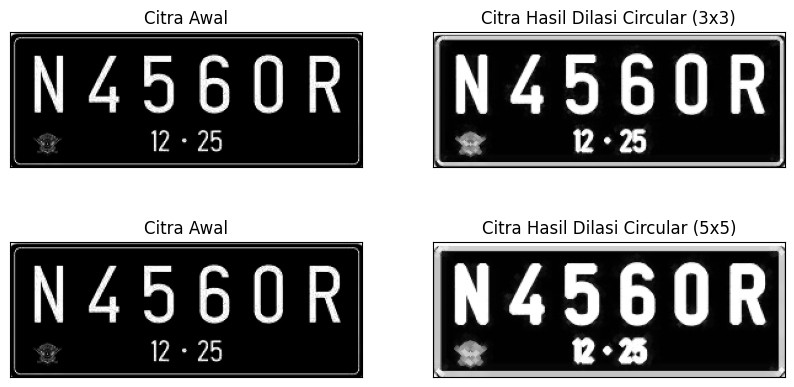

In [39]:
circle_3x3 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0],], dtype=np.uint8)

dilated_image_3x3 = cv2.dilate(image, circle_3x3)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

circle_5x5 = np.array([[0, 0, 1, 0, 0],
                      [0, 1, 1, 1, 0],
                      [1, 1, 1, 1, 1],
                      [0, 1, 1, 1, 0],
                      [0, 0, 1, 0, 0]], dtype=np.uint8)

dilated_image_5x5 = cv2.dilate(image, circle_5x5)

axs[0, 0].imshow(gamma_image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(dilated_image_3x3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi Circular (3x3)')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(gamma_image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(dilated_image_5x5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi Circular (5x5)')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

 12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

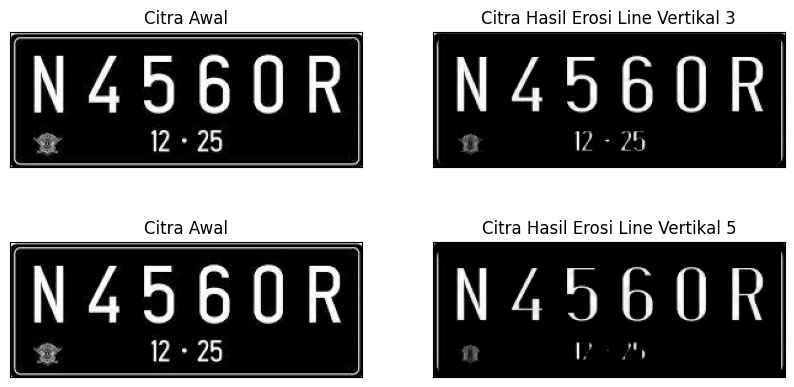

In [40]:
image = cv2.imread('/content/drive/MyDrive/PCVK/plat_nomer.jpg',0)

vertical_line_3 = np.ones((3,1), dtype=np.uint8)
vertical_line_5 = np.ones((5,1), dtype=np.uint8)

eroded_img_3 = cv2.erode(image, vertical_line_3, iterations=1)
eroded_img_5 = cv2.erode(image, vertical_line_5, iterations=1)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

axs[0, 1].imshow(eroded_img_3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi Line Vertikal 3')
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

axs[1, 0].imshow(image, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

axs[1, 1].imshow(eroded_img_5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi Line Vertikal 5')
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.show()

13. TopHat

<ipython-input-42-2969a563d548>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY), cmap='gray')


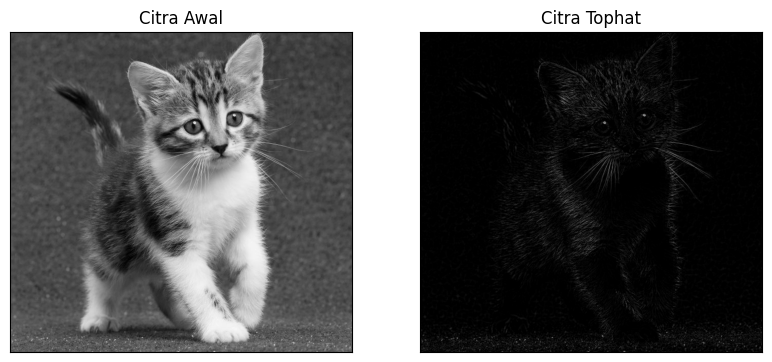

In [42]:
cat_image = cv2.imread('/content/drive/MyDrive/PCVK/kitten01.jpg',0)
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(cat_image, cv2.MORPH_TOPHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat)
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()

14. BLACKHAT

<ipython-input-60-c96b0879c3a3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY), cmap='gray')


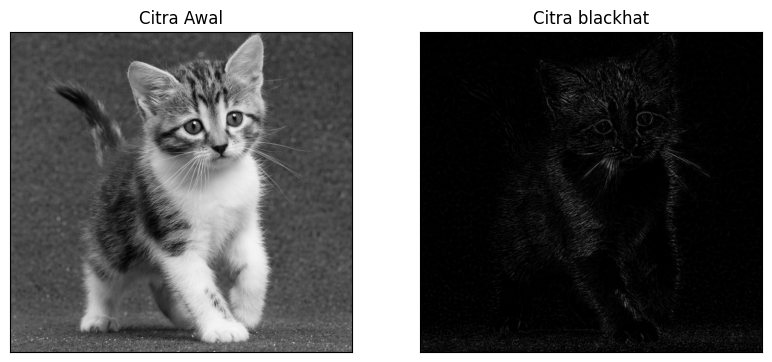

In [60]:
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(cat_image, cv2.MORPH_BLACKHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat)
plt.title('Citra blackhat'),plt.xticks([]), plt.yticks([])
plt.show()

15. Skeleton

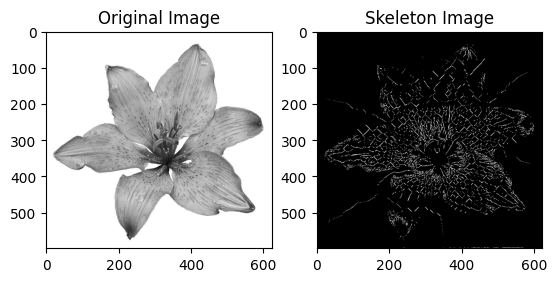

In [45]:
def skeletonize_image(img):
    ret, img = cv2.threshold(img, 127, 255, 0)

    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    while True:
        opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)

        temp = cv2.subtract(img, opened)

        eroded = cv2.erode(img, element)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        if cv2.countNonZero(img) == 0:
            break

    return skel

image_lily = cv2.imread('/content/drive/MyDrive/PCVK/lily.jpg', 0)
skeleton = skeletonize_image(image_lily)

plt.subplot(121), plt.imshow(image_lily, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.show()

16. Skeleton Inverse

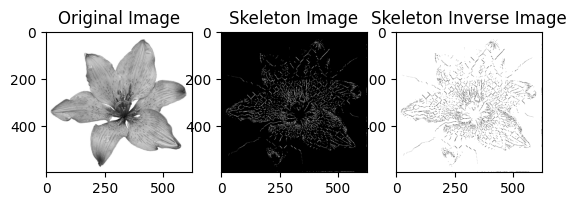

In [46]:
def inverse_skeleton(skeleton):
    inverted_skeleton = cv2.bitwise_not(skeleton)

    return inverted_skeleton

inverted_skeleton = inverse_skeleton(skeleton)

plt.subplot(131), plt.imshow(image_lily, cmap="gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.subplot(133), plt.imshow(inverted_skeleton, cmap="gray"), plt.title("Skeleton Inverse Image")
plt.show()

17. Thickening


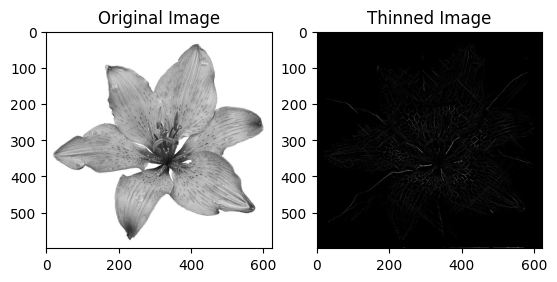

In [47]:
def thinning_image(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    thin = np.zeros(image.shape, dtype='uint8')

    img1 = image.copy()

    while (cv2.countNonZero(img1) != 0):
        erode = cv2.erode(img1, kernel)
        opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, kernel)
        subset = erode - opening
        thin = cv2.bitwise_or(subset, thin)
        img1 = erode.copy()

    return thin

thinned_image = thinning_image(image_lily)
plt.subplot(121)
plt.imshow(image_lily, cmap='gray')
plt.title("Original Image")

plt.subplot(122)
plt.imshow(thinned_image, cmap='gray')
plt.title("Thinned Image")

plt.show()

# Tugas Praktikum
Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.


In [48]:
!pip install pytesseract
!apt-get install tesseract-ocr

import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,827 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

**Dilation**

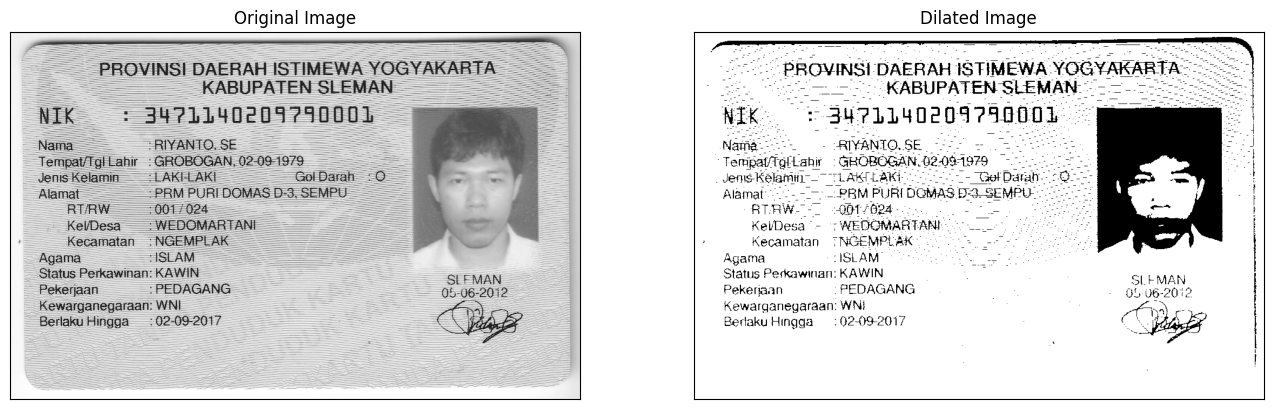

Extracted Text:
 

-PROVINSI: DAERAH iSTIMEWA, YOGYAKAR: a

KelDesa “- OI ae
Kecamatan 7NGEMPLAK

     

Agama SISLAM -o-

Status Perkawinan: KAWIN o
Pekeriaan PEDAGANG aie
Kewarganegaraan: WNi -

Berlaku Hingga  : 02-09-2017 oH

 



In [53]:
img_dilation = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)

# Mengaplikasikan peningkatan gamma
gamma_image = np.power(img_dilation / 255.0, 2.0) * 255.0

# Melakukan thresholding
ret, thresh = cv2.threshold(gamma_image, 125, 200, cv2.THRESH_BINARY)

# Menggunakan operasi dilasi
kernel = np.ones((2, 2), np.uint8)
output_image = cv2.dilate(thresh, kernel, iterations=1)

# Menampilkan citra hasil dilasi
plt.figure(figsize=(25, 10))
plt.subplot(131), plt.imshow(img_dilation, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(output_image, cmap='gray')
plt.title('Dilated Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Mengonversi citra ke format uint8
output_image = output_image.astype(np.uint8)

# Menyimpan citra hasil dilasi dalam format PNG
cv2.imwrite('dilated_image.png', output_image)

# Menggunakan pytesseract untuk mengekstrak teks dari citra
text = pytesseract.image_to_string(output_image)

print("Extracted Text:")
print(text)

**Erosion**

[[1 1]]


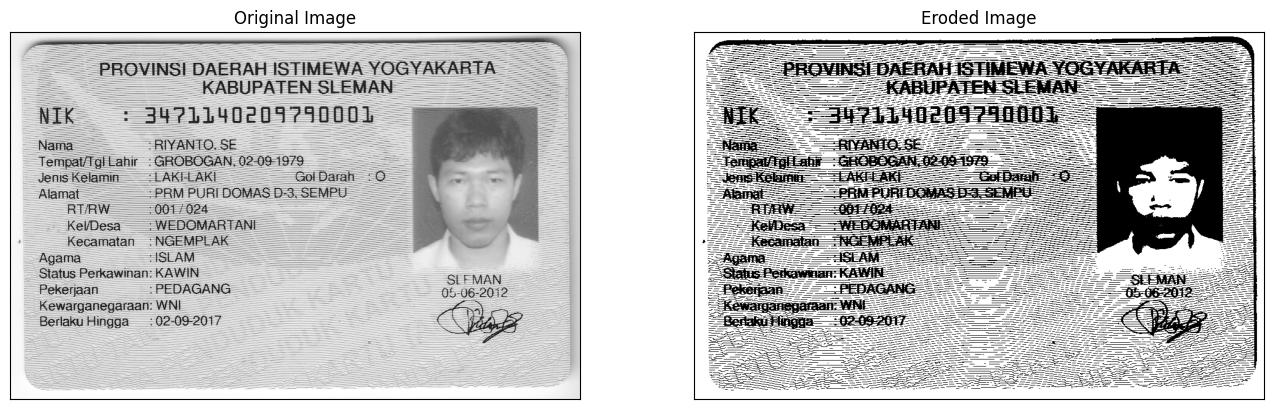

Extracted Text:
 



In [54]:
image_erotion = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)

gamma_corrected_image = np.zeros(image_erotion.shape, dtype=np.uint8)

for y in range(image_erotion.shape[0]):
    for x in range(image_erotion.shape[1]):
        gamma_corrected_image[y, x] = np.clip(255.0 * (image_erotion[y, x] / 255.0) ** (2 / 1), 0, 255)

thresholded_image = cv2.threshold(gamma_corrected_image, 125, 200, cv2.THRESH_BINARY)[1]

erosion_kernel = np.ones((1, 2), np.uint8)

eroded_image = cv2.erode(thresholded_image, erosion_kernel, iterations=1)

print(erosion_kernel)

plt.figure(figsize=(25, 10))
plt.subplot(131), plt.imshow(image_erotion, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image'), plt.xticks([]), plt.yticks([])
plt.show()

text = pytesseract.image_to_string(eroded_image)

print("Extracted Text:")
print(text)

**Opening**

<ipython-input-58-c6c9fcacd1e2>:43: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')


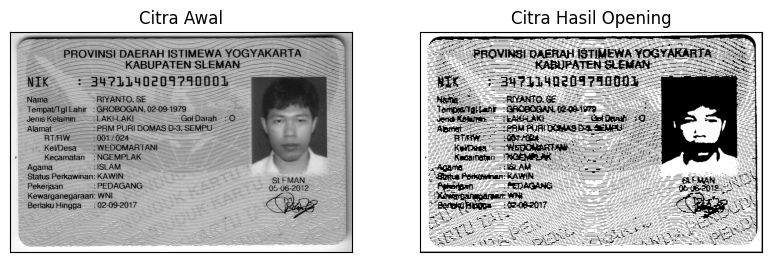

Extracted Text:
 

 

 

 

 



In [58]:
# dilasi
def dilation(image, se):
	height, width = image.shape

	output_image = np.zeros((height, width), dtype=np.uint8)

	# Generate SED
	SED = np.ones((se,se), dtype=np.uint8)
	c = int((se-1)/2)

	# Dilation
	for i in range(c, height-c):
		for j in range(c, width-c):
			temp = image[i-c:i+c+1, j-c:j+c+1]
			product = temp * SED
			output_image[i,j] = np.max(product)

	return output_image

# erosion
ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
erosioned_image = cv2.erode(thresh,kernel,iterations = 1)

# fungsi opening
def image_opening(image, se):
	eroded_image = image_erotion(image, se)
	opened_image = dilation(eroded_image, se)
	return opened_image

image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)
gamma_image = np.zeros(image.shape, image.dtype)

for y in range(image.shape[0]):
	for x in range(image.shape[1]):
		gamma_image[y,x] = np.clip(255.0 * (image[y,x]/255.0) ** (2/1), 0, 255)

ret, thresh = cv2.threshold(gamma_image, 125,200,cv2.THRESH_BINARY)
w = 3
output_image = image_opening(thresh, w)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(gamma_image,cmap = 'gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(output_image,cmap = 'gray')
plt.title('Citra Hasil Opening'),plt.xticks([]), plt.yticks([])
plt.show()

text = pytesseract.image_to_string(output_image)

print("Extracted Text:")
print(text)

**Tophat**

<ipython-input-59-38d472cd9e64>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY), cmap='gray')


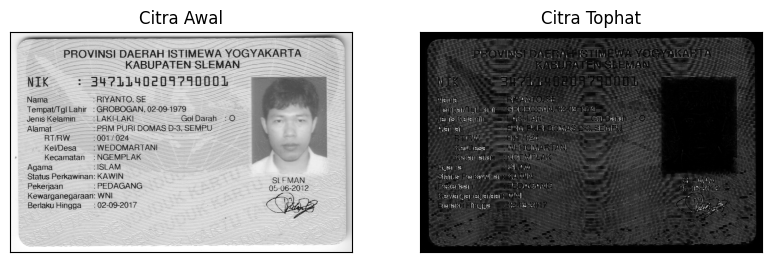

Extracted Text:
 



In [59]:
ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)
ktp_image = cv2.cvtColor(ktp_image, cv2.COLOR_BGR2RGB)

kernel = np.ones((5,5),np.uint8)
tophat = cv2.morphologyEx(ktp_image, cv2.MORPH_TOPHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(tophat)
plt.title('Citra Tophat'),plt.xticks([]), plt.yticks([])
plt.show()

text = pytesseract.image_to_string(tophat)

print("Extracted Text:")
print(text)

**Blackhat**

<ipython-input-62-3b3097eb1424>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY), cmap='gray')


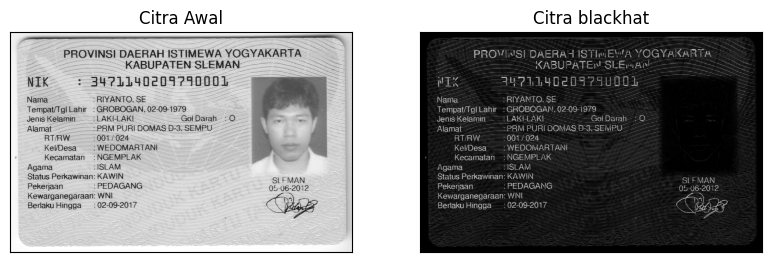

Extracted Text:
 

 

 

 



In [62]:
kernel = np.ones((5,5),np.uint8)
blackhat = cv2.morphologyEx(ktp_image, cv2.MORPH_BLACKHAT, kernel)

plt.subplots(figsize=(15, 5))
plt.subplot(131),plt.imshow(cv2.cvtColor(ktp_image, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title('Citra Awal'),plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(blackhat)
plt.title('Citra blackhat'),plt.xticks([]), plt.yticks([])
plt.show()

text = pytesseract.image_to_string(blackhat)

print("Extracted Text:")
print(text)

Skeleton

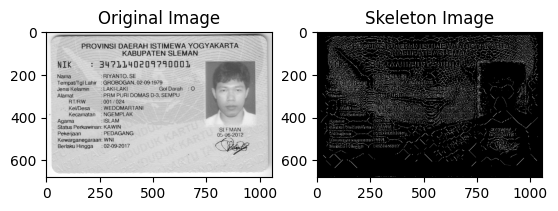

Extracted Text:
 

| = one

iain 7 aie aa a

 



In [63]:
def skeletonize_image(img):
    ret, img = cv2.threshold(img, 127, 255, 0)

    size = np.size(img)
    skel = np.zeros(img.shape, np.uint8)

    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    while True:
        opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)

        temp = cv2.subtract(img, opened)

        eroded = cv2.erode(img, element)
        skel = cv2.bitwise_or(skel, temp)
        img = eroded.copy()

        if cv2.countNonZero(img) == 0:
            break

    return skel

ktp_image = cv2.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)
skeleton = skeletonize_image(ktp_image)

plt.subplot(121), plt.imshow(ktp_image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.show()

text = pytesseract.image_to_string(skeleton)

print("Extracted Text:")
print(text)

**Invers** **Skeleton**

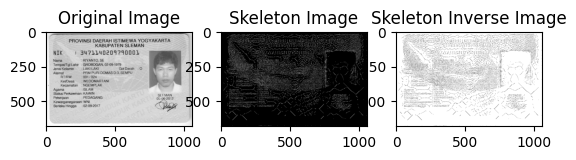

Extracted Text:
 

| ae ESM Lista)

Volta, . PASE a

 



In [65]:
def inverse_skeleton(skeleton):
    inverted_skeleton = cv2.bitwise_not(skeleton)

    return inverted_skeleton

inverted_skeleton = inverse_skeleton(skeleton)

plt.subplot(131), plt.imshow(ktp_image, cmap="gray"), plt.title("Original Image")
plt.subplot(132), plt.imshow(skeleton, cmap="gray"), plt.title("Skeleton Image")
plt.subplot(133), plt.imshow(inverted_skeleton, cmap="gray"), plt.title("Skeleton Inverse Image")
plt.show()

text = pytesseract.image_to_string(inverted_skeleton)

print("Extracted Text:")
print(text)